In [17]:
import glob
import os
from PIL import Image
import numpy as np

def pil_grid(images, max_horiz=np.iinfo(int).max):
    n_images = len(images)
    n_horiz = min(n_images, max_horiz)
    h_sizes, v_sizes = [0] * n_horiz, [0] * (n_images // n_horiz)
    for i, im in enumerate(images):
        h, v = i % n_horiz, i // n_horiz
        h_sizes[h] = max(h_sizes[h], im.size[0])
        v_sizes[v] = max(v_sizes[v], im.size[1])
    h_sizes, v_sizes = np.cumsum([0] + h_sizes), np.cumsum([0] + v_sizes)
    im_grid = Image.new('RGB', (h_sizes[-1], v_sizes[-1]), color='white')
    for i, im in enumerate(images):
        im_grid.paste(im, (h_sizes[i % n_horiz], v_sizes[i // n_horiz]))
    return im_grid

In [26]:
dataset = 'CUIMC'

if dataset == 'AMGEN':
    path_ScaleNAS = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/ScaleNAS/mask_1661/Images_PDS_AMGEN_20020408_22Cat_test_UnionMask_liver/'
    path_MVP_Q1 = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/Images_PDS_AMGEN_20020408_22Cat_test_UnionMask_liver/'
    path_MVP_Q2 = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/Q2_Images_PDS_AMGEN_20020408_22Cat_test_UnionMask/'
elif dataset == 'CUIMC':
    path_ScaleNAS = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/ScaleNAS/mask_1661/Images_PDS_CUIMC_22Cat_test_UnionMask_liver/'
    path_MVP_Q1 = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/Images_PDS_CUIMC_22Cat_test_UnionMask_liver/'
    path_MVP_Q2 = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/Q2_Images_PDS_CUIMC_22Cat_test_UnionMask/'
else:
    raise 
    
path_save = '/mnt/fast-disk1/mjc/AutoRecist/Outputs/Comparison/Q1_Q2_ScaleNAS_%s/'%dataset
if not os.path.exists(path_save):
    os.makedirs(path_save)

In [27]:
files = glob.glob( os.path.join(path_MVP_Q1, '*.png' ) )
files.sort()
files = [os.path.split(f)[1] for f in files]

In [28]:
for file in files:
        
    im1 = Image.open(os.path.join( path_MVP_Q1,file ))
    im2 = Image.open(os.path.join( path_MVP_Q2,file ))
    im3 = Image.open(os.path.join( path_ScaleNAS,file ))
    images = [im1,im2,im3]
    im = pil_grid(images)
    
    im.save(os.path.join(path_save, file ))

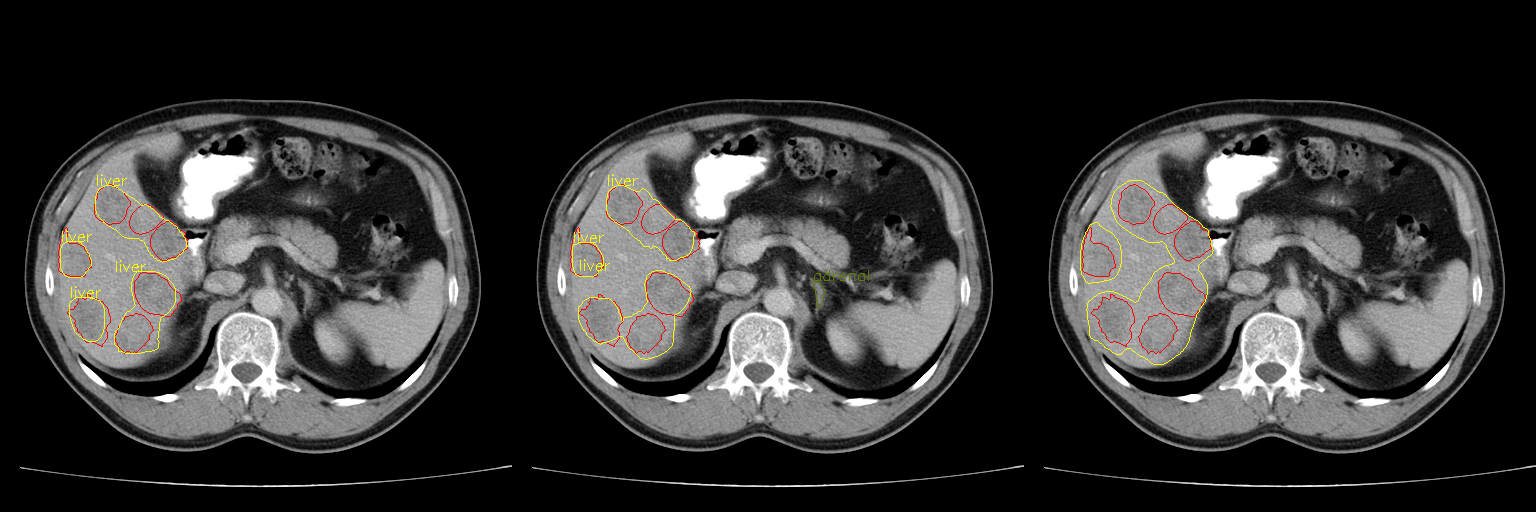

In [23]:
im

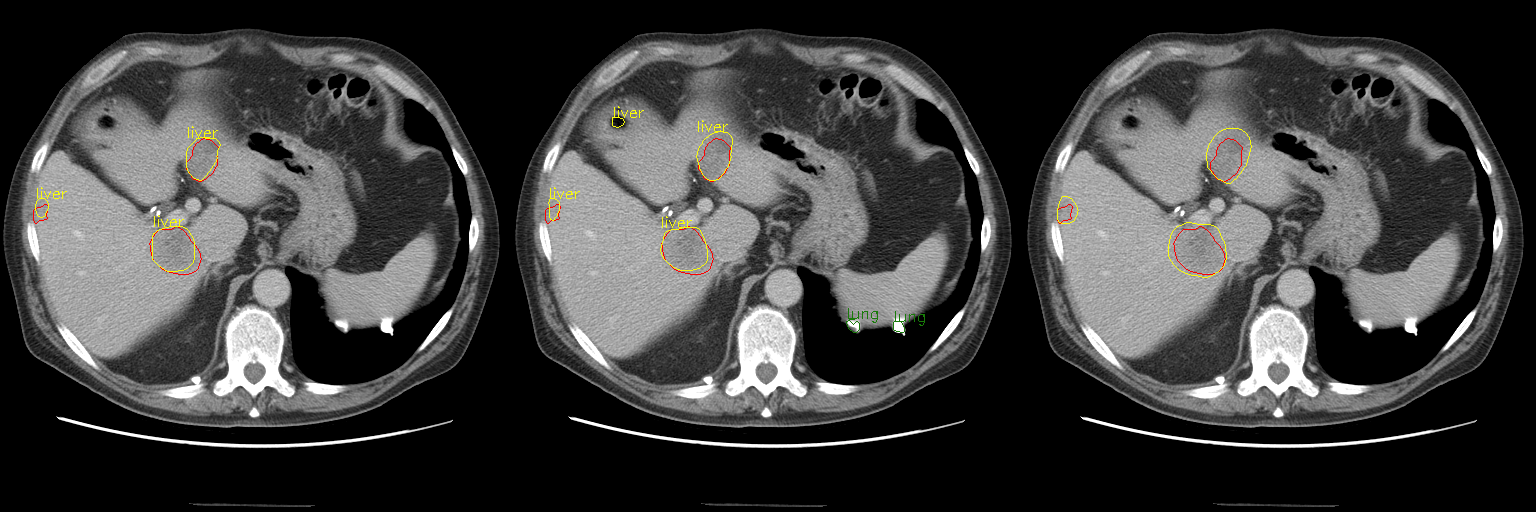

In [19]:
im